In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
m = 10
M = m*np.eye(2)
C = 0
d = 0
R = np.zeros((2, 2))

V_init = np.matrix([[0], [0]])


N = 100

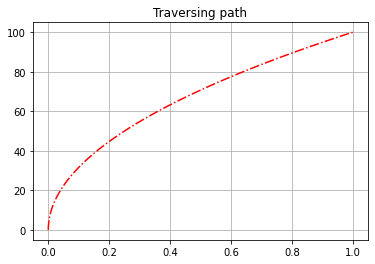

In [3]:
# PATH gen
x = np.linspace(0, 1, N).reshape(-1, 1)
q = np.hstack((np.power(x, 2), 100*x)).T

plt.figure()
plt.plot(q[0, :], q[1, :], "r-.")
plt.grid()
plt.title("Traversing path")
plt.show()

In [4]:
def R(s):
    n = s.shape[1]
    r = np.zeros((n, 2, 2))
    phi = np.arctan(s[1, :]/s[0, :])
    for i in range(n):
        r[i, :, :] = np.matrix([[np.cos(phi[i]), -1*np.sin(phi[i])], [np.sin(phi[i]), np.cos(phi[i])]])
    return r

thetha = np.linspace(0, 1, N).reshape(1, -1)
dthetha = thetha[0, 1] - thetha[0, 0]

def get_bar(thetha, N):
    thetha_bar = []
    for i in range(1, N):
        thetha_bar.append((thetha[:, i] + thetha[:, i-1])/2)
    thetha_bar = np.array(thetha_bar).reshape(1, -1)
    return thetha_bar

thetha_bar = get_bar(thetha, N)

u = cp.Variable((2, N))
b = cp.Variable((1, N))

b_bar = get_bar(b, N)

a = (cp.diff(b.T, k=1)/(2*dthetha)).T

s_bar_1 = (cp.diff(q.T, k=1)/dthetha).T

s_bar_2 = (cp.diff(q.T, k=2)/dthetha).T

In [5]:
t = cp.Variable((1, N-1))

cost = cp.sum(t)

Objective = cp.Minimize(cost)

In [6]:
R_tilde = R(s_bar_1.value)
m_tilde = M@s_bar_1
c_tilde = M@cp.hstack((s_bar_2, cp.reshape(s_bar_2[:, -1], (2, 1)))) + C*cp.power(s_bar_1, 2)
d_tilde = d

s_1 = cp.diff(q, axis=1)

In [7]:
alpha = 0

Constraints = []
for i in range(1, N-1):
    Constraints.append(R_tilde[i]@cp.reshape(u[:, i], (2, 1)) == m_tilde*a[:, i] + c_tilde*0.5*(b[:, i-1] + b[:, i]) + d_tilde)

Constraints.append(b[:, 0] == cp.power(np.linalg.norm(V_init)*dthetha/np.linalg.norm(q[1] - q[0]), 2))


for i in range(1, N):
    Constraints.append(2*dthetha*cp.inv_pos(t[0, i-1]) - cp.sqrt(b[0, i]) - cp.sqrt(b[0, i-1]) <= 0)

In [8]:
problem = cp.Problem(objective=Objective, constraints=Constraints)

In [9]:
problem.solve(verbose=True, solver='ECOS_BB')

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Apr 29 03:06:10 PM: Your problem has 399 variables, 198 constraints, and 0 parameters.
(CVXPY) Apr 29 03:06:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 29 03:06:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 29 03:06:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 29 03:06:10 PM: Compiling problem (target solver=ECOS_BB).
(CVXPY) Apr 29 03:06:10 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuff

65  +5.004e-02  +5.004e-02  +8e-11  1e-06  2e-07  2e-09  2e-13  0.8058  4e-01   2  2  1 |  0  0
66  +5.005e-02  +5.005e-02  +9e-11  1e-06  2e-07  3e-09  2e-13  0.2038  9e-01   1  2  2 |  0  0
67  +5.249e-02  +5.249e-02  +6e-11  8e-07  2e-07  4e-09  2e-13  0.9890  5e-01   2  2  2 |  0  0
68  +5.186e-02  +5.186e-02  +7e-11  6e-07  2e-07  3e-09  2e-13  0.8646  5e-01   2  1  1 |  0  0
69  +4.553e-02  +4.553e-02  +1e-10  1e-06  3e-07  3e-09  3e-13  0.8424  4e-01   2  2  2 |  0  0
70  +4.559e-02  +4.559e-02  +1e-10  1e-06  3e-07  3e-09  3e-13  0.1486  9e-01   1  1  2 |  0  0
71  +4.542e-02  +4.542e-02  +1e-10  7e-07  3e-07  5e-09  3e-13  0.9890  5e-01   1  2  2 |  0  0
72  +4.720e-02  +4.720e-02  +8e-11  4e-07  2e-07  4e-09  2e-13  0.9305  3e-01   2  2  2 |  0  0
73  +4.832e-02  +4.832e-02  +4e-11  6e-07  2e-07  1e-09  9e-14  0.8993  1e-01   1  1  1 |  0  0
74  +4.819e-02  +4.819e-02  +5e-11  6e-07  2e-07  2e-09  1e-13  0.1390  9e-01   2  2  2 |  0  0
75  +4.678e-02  +4.678e-02  +8e-11  7e-0

/home/solomon/.local/lib/python3.8/site-packages/cvxpy/problems/problem.py:1333: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.05680706056717513

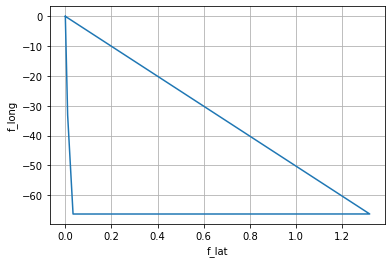

In [10]:
plt.figure()
plt.plot(u.value[0, :], u.value[1, :])
plt.xlabel('f_lat')
plt.ylabel('f_long')
plt.grid()
plt.show()

In [11]:
t = 0
for i in range(1, N):
    t += 2*dthetha/(np.sqrt(b.value[0, i-1]) + np.sqrt(b.value[0, i]))
print("Optimal time for traversal is {}".format(t))

Optimal time for traversal is 0.05575500446479203
